In [1]:
import os 
import time
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
from scipy.stats import chi2_contingency 
from sklearn.linear_model import LinearRegression
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df_imagerie = pd.read_excel("/home/ishaq/Downloads/Tableurs/participants2.xlsx") #participants2 ==> fichier obtenu après avoir trier les T1w et les multiGRE 
df_clinique = pd.read_csv("/home/ishaq/Downloads/Tableurs/participantsIB.tsv") #participantsIB ==> fichier obtenu après avoir éliminer les participants où les atteintes n'étaient pas mentionné ainsi que les atteintes périphériques 
df_finale = pd.read_excel("/home/ishaq/Downloads/Tableurs/atteintes_ALS.xlsx", dtype={"SUBJID":str})
df = pd.DataFrame()
pb_initiale = []

In [3]:
#Trouver les participants communs entre les deux dataframes
ind = 0
for index, row in df_clinique.iterrows():
    variable = row["participant_id"]
    for index, row in df_imagerie.iterrows():
        variable2 = row["participant_id"]
        if variable[:-3] == variable2[:-3] :
            if variable == variable2 : 
                print("Correspondance :", variable, variable2)
            else : 
                print("Correspondance :", variable, variable2, "Problème initiale")
                pb_initiale.append(variable2)
            df.at[ind,"participant_id"] = variable2 #Ajout du participant présent dans les deux dataframes dans le dataframe df(avec les bonnes initiales)
    ind+=1     

Correspondance : 01002KAP 01002KAP
Correspondance : 01005AGP 01005AGP
Correspondance : 01006SCP 01006SCP
Correspondance : 01007LAP 01007LAP
Correspondance : 01008LBP 01008LBP
Correspondance : 01010DCP 01010DCP
Correspondance : 01012CCP 01012CCP
Correspondance : 01013BCP 01013BCP
Correspondance : 01014FMP 01014FMP
Correspondance : 01015MCP 01015MCP
Correspondance : 01016WRP 01016WRP
Correspondance : 01017NBP 01017NBP
Correspondance : 01018BVP 01018BVP
Correspondance : 01019VJP 01019VJP
Correspondance : 01021EMP 01021EMP
Correspondance : 01022SDP 01022SDP
Correspondance : 01023AMP 01023AMP
Correspondance : 01024GJP 01024GJP
Correspondance : 01025FVP 01025FVP
Correspondance : 01027KJP 01027KJP
Correspondance : 01030CBP 01030CBP
Correspondance : 01035CJP 01035CJP
Correspondance : 01036TTP 01036TTP
Correspondance : 01038DMP 01038DMP
Correspondance : 01040LIP 01040LLP Problème initiale
Correspondance : 01042DDP 01042DDP
Correspondance : 01043PMP 01043PMP
Correspondance : 01049DJP 01049DJP
Co

In [4]:
df_save = df

In [5]:
df.to_excel("/home/ishaq/Downloads/Tableurs/Participants_gardés.xlsx")
df.to_csv("/home/ishaq/Downloads/Tableurs/participants_gardes.tsv", sep='\t', index=False)
df_finale["SUBJID"] = df_finale["SUBJID"].astype(str) 
df = df_save
df = df.reset_index(drop=True)
df_finale = df_finale.reset_index(drop=True)

/tmp/ipykernel_1842409/2196669580.py:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df.to_excel("/home/ishaq/Downloads/Tableurs/Participants_gardés.xlsx")


In [6]:
# Ajout des données cliniques aux participants du dataframe df
new_rows = []

for index1, row1 in df.iterrows(): 
    variable = row1["participant_id"][:-3]
    for index2, row2 in df_finale.iterrows(): 
        variable1 = str(row2["SUBJID"])
        if variable == variable1 : 
            new_row = pd.concat([row1, row2])
            new_rows.append(new_row)

result_df = pd.DataFrame(new_rows)
result_df 

,participant_id,Unnamed: 0,SUBJID,INIT_NOM,INIT_PRENOM,AGE,SEXE,SITE_APP,RILU,D_PS,...,V24,V27,V30,V33,V36,D_INCLU,Difference_en_mois,Diff_inclusion_PS,Score_de_declinaison,Declin
0,01002KAP,1,01002,K,A,68,M,Bulbaire,1.0,2014-03-07,...,NaN,NaN,NaN,NaN,NaN,2015-01-28,5.0,-11.0,0.551433,Slow
1,01005AGP,2,01005,A,G,51,M,Membre inférieur,1.0,2014-02-07,...,NaN,NaN,NaN,NaN,NaN,2015-03-17,11.0,-14.0,0.316186,Slow
2,01006SCP,3,01006,S,C,55,M,Membre inférieur,1.0,2013-12-07,...,44.0,44.0,44.0,43.0,43.0,2015-05-19,16.0,-18.0,0.088537,Slow
3,01007LAP,4,01007,L,A,63,F,Membre inférieur,1.0,2014-05-07,...,NaN,NaN,NaN,NaN,NaN,2015-05-28,7.0,-13.0,0.741379,Fast
4,01008LBP,5,01008,L,B,53,F,Bulbaire,1.0,2013-12-07,...,NaN,NaN,NaN,NaN,NaN,2015-06-03,16.0,-19.0,1.018623,Fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19035SPP,260,19035,S,P,59,M,Membre supérieur,0.0,2019-07-07,...,NaN,NaN,NaN,NaN,NaN,2021-03-10,20.0,-21.0,0.333333,Slow
187,19036CJP,261,19036,C,J,73,F,Membre inférieur,1.0,2019-06-07,...,NaN,NaN,NaN,NaN,NaN,2021-04-07,18.0,-23.0,0.681200,Fast
188,19037GHP,262,19037,G,H,65,M,Membre inférieur,0.0,2020-06-07,...,NaN,NaN,NaN,NaN,NaN,2021-05-26,12.0,-12.0,0.183707,Slow
189,19038HGP,263,19038,H,G,53,F,Membre inférieur,0.0,2016-07-07,...,NaN,NaN,NaN,NaN,NaN,2021-06-09,59.0,-60.0,0.116667,Slow


In [7]:
df = result_df
#Elimination des colonnes inutiles
colonnes_a_eliminer = ["Unnamed: 0","D_PS","D_DIAG","V3","V6","V9","V12", "V15","V18","V21","V24","V27","V30","V33","V36","D_INCLU","Difference_en_mois"] 
df = df.drop(columns=colonnes_a_eliminer)
#Ajout des centres d'inclusion 
correspondance_ville = {"01":"Lille", "02":"Autres", "03":"Paris", "04":"Autres", "05":"Brest", "07":"Lyon","08":"Montpellier","09":"Autres","10":"Autres","13":"Autres","15":"Autres","16":"Caen","17":"St-Brieuc","19":"Angers"}
def mapper_ville(identifiant):
    return correspondance_ville.get(identifiant[:2], 'Ville inconnue')
df['Centre']= df['SUBJID'].apply(mapper_ville)

df.to_excel("/home/ishaq/Downloads/Tableurs/Liste_finale_des_participants_gardés.xlsx")

/tmp/ipykernel_1842409/1235758923.py:11: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df.to_excel("/home/ishaq/Downloads/Tableurs/Liste_finale_des_participants_gardés.xlsx")


In [8]:
df["Diff_inclusion_PS"] = df["Diff_inclusion_PS"].abs()
df

,participant_id,SUBJID,INIT_NOM,INIT_PRENOM,AGE,SEXE,SITE_APP,RILU,SIT_BUL_CENT,SIT_BUL_PERI,...,SIT_CER_PERI,SIT_THO_CENT,SIT_THO_PERI,SIT_LOM_CENT,SIT_LOM_PERI,V0,Diff_inclusion_PS,Score_de_declinaison,Declin,Centre
0,01002KAP,01002,K,A,68,M,Bulbaire,1.0,Oui,Oui,...,Oui,Non,Non,Non,Non,34.0,11.0,0.551433,Slow,Lille
1,01005AGP,01005,A,G,51,M,Membre inférieur,1.0,Non,Non,...,Non,Non,Non,Oui,Oui,43.0,14.0,0.316186,Slow,Lille
2,01006SCP,01006,S,C,55,M,Membre inférieur,1.0,Non,Non,...,Oui,Non,Non,Oui,Oui,46.0,18.0,0.088537,Slow,Lille
3,01007LAP,01007,L,A,63,F,Membre inférieur,1.0,Non,Non,...,Non,Oui,Oui,Oui,Oui,39.0,13.0,0.741379,Fast,Lille
4,01008LBP,01008,L,B,53,F,Bulbaire,1.0,Oui,Oui,...,Oui,Oui,Oui,Oui,Oui,29.0,19.0,1.018623,Fast,Lille
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19035SPP,19035,S,P,59,M,Membre supérieur,0.0,Oui,Oui,...,Oui,Oui,Oui,Oui,Oui,41.0,21.0,0.333333,Slow,Angers
187,19036CJP,19036,C,J,73,F,Membre inférieur,1.0,Non,Non,...,Oui,Oui,Oui,Oui,Oui,39.0,23.0,0.681200,Fast,Angers
188,19037GHP,19037,G,H,65,M,Membre inférieur,0.0,Non,Non,...,Oui,Oui,Oui,Oui,Oui,43.0,12.0,0.183707,Slow,Angers
189,19038HGP,19038,H,G,53,F,Membre inférieur,0.0,Non,Non,...,Oui,Non,Non,Oui,Oui,41.0,60.0,0.116667,Slow,Angers


In [9]:
## AJOUT DE LA LATERALITE

df_test_muscu = pd.read_excel("/home/ishaq/Downloads/Tableurs/Ishaq-Romain M2 Fev2024.xlsx", sheet_name = "Testing muscu", dtype={"SUBJID":str})
df_lateralite = df_test_muscu
df_lateralite = df_lateralite.dropna(subset=["LATERALITE"])
nb_participants_lateralite = df_lateralite['SUBJID'].nunique()
valeurs_differentes = df_lateralite['SUBJID'].unique()

for index, row in df_lateralite.iterrows():
    variable1 = row["SUBJID"]
    lateralite = row["LATERALITE"]
    for index, row in df.iterrows():
        variable2 = row["SUBJID"]
        if variable1 == variable2 : 
            df.at[index,"LATERALITE"] = lateralite

In [10]:
## AJOUT DU SCORE TM

df_tm = df_test_muscu 
df_tm = df_tm.loc[df_tm['VISIT'] == 'Inclusion Visit']

for index, row in df_tm.iterrows():
    variable1 = row["SUBJID"]
    tm = row["SCORE_TM"]
    for index,row in df.iterrows():
        variable2 = row["SUBJID"]
        if variable1 == variable2 : 
            df.at[index, "SCORE_TM"] = tm 


In [11]:
df_temp = pd.read_excel("/home/ishaq/Downloads/Tableurs/Ishaq-Romain M2 Fev2024.xlsx", sheet_name = "Inclusion", dtype={"SUBJID":str})

for index, row in df_temp.iterrows():
    variable1 = row["SUBJID"]
    f_fami = row["FORM_FAM"]
    for index, row in df.iterrows():
        variable2 = row["SUBJID"]
        if variable1 == variable2 :
            df.at[index, "FORM_FAM"] = f_fami

for index, row in df_temp.iterrows():
    variable1 = row["SUBJID"]
    case = row["SUBJECT_GROUP"]
    for index, row in df.iterrows():
        variable2 = row["SUBJID"]
        if variable1 == variable2 : 
            df.at[index, "SUBJECT_GROUP"] = case 


In [12]:
df

,participant_id,SUBJID,INIT_NOM,INIT_PRENOM,AGE,SEXE,SITE_APP,RILU,SIT_BUL_CENT,SIT_BUL_PERI,...,SIT_LOM_PERI,V0,Diff_inclusion_PS,Score_de_declinaison,Declin,Centre,LATERALITE,SCORE_TM,FORM_FAM,SUBJECT_GROUP
0,01002KAP,01002,K,A,68,M,Bulbaire,1.0,Oui,Oui,...,Non,34.0,11.0,0.551433,Slow,Lille,Droitier,88.0,Non,Case
1,01005AGP,01005,A,G,51,M,Membre inférieur,1.0,Non,Non,...,Oui,43.0,14.0,0.316186,Slow,Lille,Droitier,106.0,Non,Case
2,01006SCP,01006,S,C,55,M,Membre inférieur,1.0,Non,Non,...,Oui,46.0,18.0,0.088537,Slow,Lille,Droitier,106.0,Non,Case
3,01007LAP,01007,L,A,63,F,Membre inférieur,1.0,Non,Non,...,Oui,39.0,13.0,0.741379,Fast,Lille,Droitier,0.0,Oui,Case
4,01008LBP,01008,L,B,53,F,Bulbaire,1.0,Oui,Oui,...,Oui,29.0,19.0,1.018623,Fast,Lille,Droitier,79.0,Suspicion,Case
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19035SPP,19035,S,P,59,M,Membre supérieur,0.0,Oui,Oui,...,Oui,41.0,21.0,0.333333,Slow,Angers,Droitier,94.0,Non,Case
187,19036CJP,19036,C,J,73,F,Membre inférieur,1.0,Non,Non,...,Oui,39.0,23.0,0.681200,Fast,Angers,Droitier,81.0,Non,Case
188,19037GHP,19037,G,H,65,M,Membre inférieur,0.0,Non,Non,...,Oui,43.0,12.0,0.183707,Slow,Angers,Droitier,107.0,Non,Case
189,19038HGP,19038,H,G,53,F,Membre inférieur,0.0,Non,Non,...,Oui,41.0,60.0,0.116667,Slow,Angers,Droitier,100.0,Non,Case


In [13]:
#Transformer les OUI/NON en 1 et 0 
atteinte = ["SIT_BUL_CENT","SIT_BUL_PERI","SIT_CER_CENT","SIT_CER_PERI","SIT_THO_CENT","SIT_THO_PERI","SIT_LOM_CENT","SIT_LOM_PERI"]

for index, row in df.iterrows(): 
    for i in atteinte : 
        if df.at[index,i] == "Oui":
            df.at[index, i] = int(1)
        if df.at[index,i] == "Non":
            df.at[index,i] = int(0)

In [14]:
### Ajout des DFT
df_dft = pd.read_excel("/home/ishaq/Downloads/Tableurs/Ishaq-Romain M2 Fev2024.xlsx", sheet_name = "CritereDMSIVDFT", dtype={"SUBJID":str})
colonnes_a_garder = ["SUBJID", "CRITERE_DFT"]
df_dft = df_dft[colonnes_a_garder]
df_dft = df_dft.dropna(subset=["CRITERE_DFT"])
df_dft = df_dft.loc[df_dft["CRITERE_DFT"]== "Oui"]
df_dft

for index, row in df_dft.iterrows(): 
    dft = row["CRITERE_DFT"]
    subj1 = row["SUBJID"]
    for index, row in df.iterrows():
        subj2 = row["SUBJID"]
        if subj1 == subj2 : 
            df.at[index, "DFT"] = "Oui"
for index,row in df.iterrows():
    if row["DFT"] == "NaN" : 
        row["DFT"] = "Non"
df

,participant_id,SUBJID,INIT_NOM,INIT_PRENOM,AGE,SEXE,SITE_APP,RILU,SIT_BUL_CENT,SIT_BUL_PERI,...,V0,Diff_inclusion_PS,Score_de_declinaison,Declin,Centre,LATERALITE,SCORE_TM,FORM_FAM,SUBJECT_GROUP,DFT
0,01002KAP,01002,K,A,68,M,Bulbaire,1.0,1,1,...,34.0,11.0,0.551433,Slow,Lille,Droitier,88.0,Non,Case,NaN
1,01005AGP,01005,A,G,51,M,Membre inférieur,1.0,0,0,...,43.0,14.0,0.316186,Slow,Lille,Droitier,106.0,Non,Case,NaN
2,01006SCP,01006,S,C,55,M,Membre inférieur,1.0,0,0,...,46.0,18.0,0.088537,Slow,Lille,Droitier,106.0,Non,Case,NaN
3,01007LAP,01007,L,A,63,F,Membre inférieur,1.0,0,0,...,39.0,13.0,0.741379,Fast,Lille,Droitier,0.0,Oui,Case,Oui
4,01008LBP,01008,L,B,53,F,Bulbaire,1.0,1,1,...,29.0,19.0,1.018623,Fast,Lille,Droitier,79.0,Suspicion,Case,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19035SPP,19035,S,P,59,M,Membre supérieur,0.0,1,1,...,41.0,21.0,0.333333,Slow,Angers,Droitier,94.0,Non,Case,NaN
187,19036CJP,19036,C,J,73,F,Membre inférieur,1.0,0,0,...,39.0,23.0,0.681200,Fast,Angers,Droitier,81.0,Non,Case,NaN
188,19037GHP,19037,G,H,65,M,Membre inférieur,0.0,0,0,...,43.0,12.0,0.183707,Slow,Angers,Droitier,107.0,Non,Case,NaN
189,19038HGP,19038,H,G,53,F,Membre inférieur,0.0,0,0,...,41.0,60.0,0.116667,Slow,Angers,Droitier,100.0,Non,Case,NaN


In [15]:
df.to_excel("/home/ishaq/Downloads/Tableurs/Liste_finale_des_participants_gardés.xlsx")

/tmp/ipykernel_1842409/47942972.py:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df.to_excel("/home/ishaq/Downloads/Tableurs/Liste_finale_des_participants_gardés.xlsx")


In [16]:
nb_bulbaire = len(df[df["SITE_APP"] == "Bulbaire"])
nb_mem_sup = len(df[df["SITE_APP"] == "Membre supérieur"])
nb_mem_inf = len(df[df["SITE_APP"] == "Membre inférieur"])
nb_respiratoire = len(df[df["SITE_APP"] == "Respiratoire"])
nb_spinaux = nb_mem_inf + nb_mem_sup
nb_total = nb_bulbaire + nb_spinaux + nb_respiratoire
nb_slow = len(df[df["Declin"] == "Slow"])
nb_fast = len(df[df["Declin"] == "Fast"])
nb_pasDeclin = nb_total - nb_slow - nb_fast
n_M = len(df[df["SEXE"] == "M"])
n_F = len(df[df["SEXE"] == "F"])
n_rilu= len(df[df["RILU"] == 1])
print(f"Nombre de respiratoire : {nb_respiratoire}\nNombre de bulbaires : {nb_bulbaire}\nNombre de spinaux : {nb_spinaux}\nNombre de spinaux membre sup : {nb_mem_sup}\nNombre de spinaux membre inf : {nb_mem_inf}\nNombre de déclineurs lents : {nb_slow}\nNombre de déclineurs rapides : {nb_fast}\nNombre de participants sans données liées au déclin : {nb_pasDeclin}")
print(f"Nombre d'hommes = {n_M}\nNombre de femmes = {n_F}\nNombre de participants traités au riluzole : {n_rilu}")

Nombre de respiratoire : 0
Nombre de bulbaires : 45
Nombre de spinaux : 146
Nombre de spinaux membre sup : 78
Nombre de spinaux membre inf : 68
Nombre de déclineurs lents : 88
Nombre de déclineurs rapides : 94
Nombre de participants sans données liées au déclin : 9
Nombre d'hommes = 116
Nombre de femmes = 75
Nombre de participants traités au riluzole : 146


In [17]:
#Comparaison proportion homme/femme
proportion_theorique = 1.35
nombre_echantillon = n_M + n_F
statistique_test, p_value = proportions_ztest(n_M,nombre_echantillon,proportion_theorique)
print("Statistique du test :", statistique_test)
print("P-value :", p_value)

if p_value < 0.05 : 
    print("La proportion observée est significativement différente de la proportion théorique")
else : 
    print("Pas de différence observée")

Statistique du test : -21.017758494340846
P-value : 4.512461996009514e-98
La proportion observée est significativement différente de la proportion théorique


In [18]:
#Comparaison proportion spinale/bulbaire
proportion_theorique = 0.7
nombre_echantillon = n_M + n_F
statistique_test, p_value = proportions_ztest(nb_spinaux,nombre_echantillon,proportion_theorique)
print("Statistique du test :", statistique_test)
print("P-value :", p_value)

if p_value < 0.05 : 
    print("La proportion observée est significativement différente de la proportion théorique")
else : 
    print("Pas de différence observée")

Statistique du test : 2.097196432552835
P-value : 0.03597619017613801
La proportion observée est significativement différente de la proportion théorique


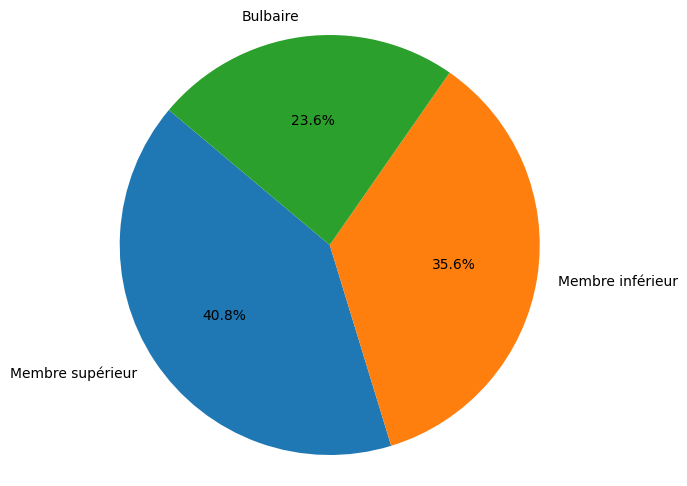

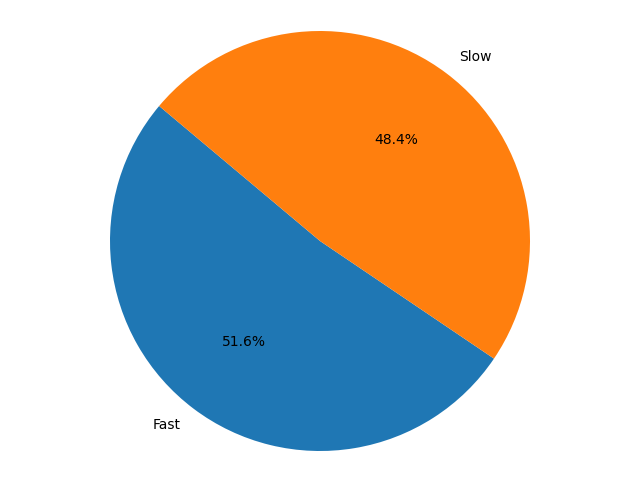

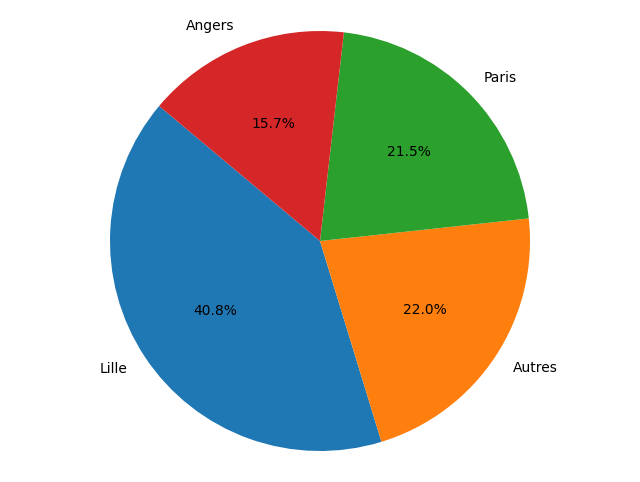

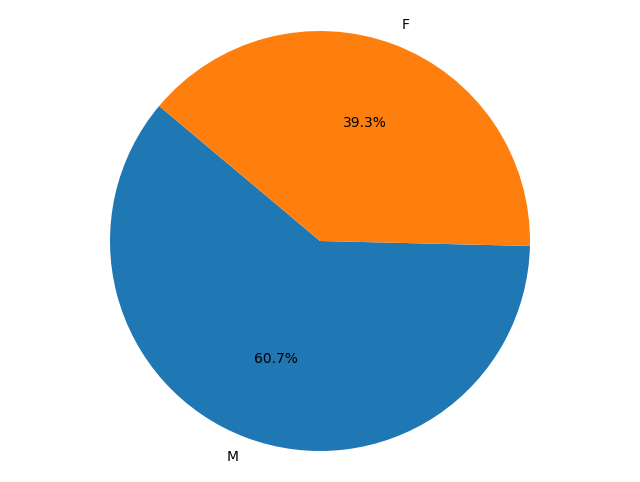

In [19]:
categories = ["SITE_APP", "Declin", "Centre", "SEXE"]
for i in categories : 
    valeurs = df[i].value_counts()
    plt.figure(figsize=(8,6))
    plt.pie(valeurs, labels=valeurs.index, autopct='%1.1f%%', startangle = 140)
    plt.axis("equal")
    plt.savefig(f"/home/ishaq/Downloads/Figures/{i}.jpeg")
    plt.show()

In [20]:
moyenne = df['AGE'].mean() #Moyenne d'âge
print(moyenne)

60.47643979057592


<Axes: xlabel='AGE', ylabel='Count'>

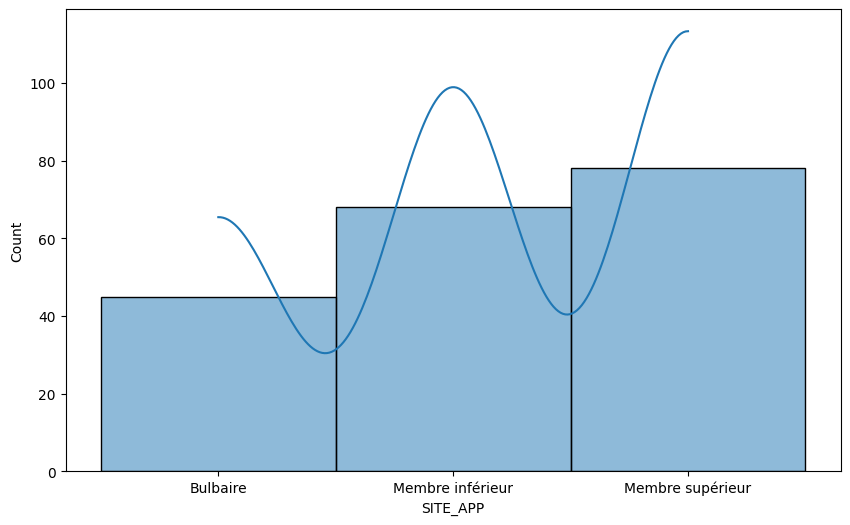

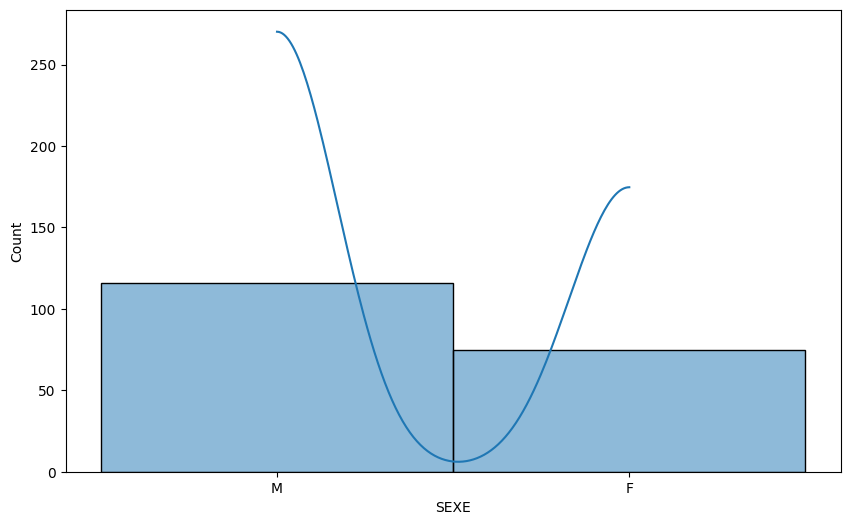

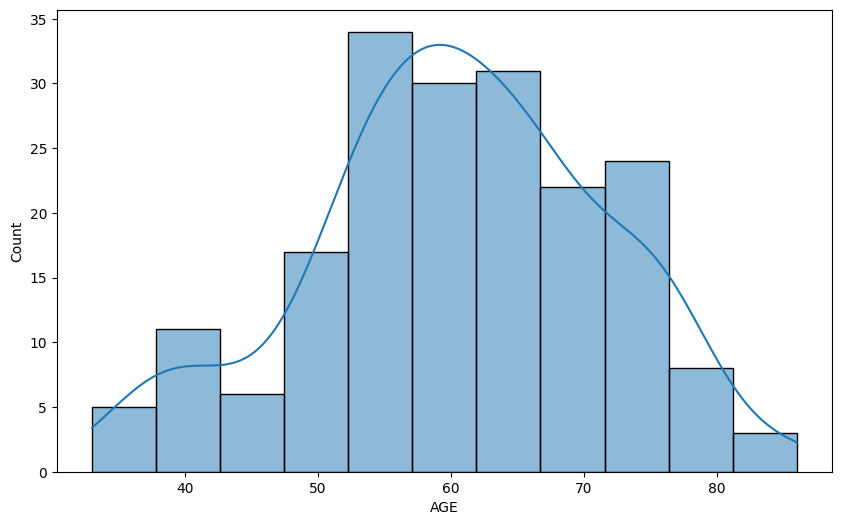

In [21]:
#Courbe de densité sur les phénotypes retrouvés, le sexe et l'âge 
plt.figure(figsize=(10,6))
sns.histplot(df["SITE_APP"], kde = True, legend = True)
plt.figure(figsize =(10,6))
sns.histplot(df['SEXE'], kde = True, legend = True)
plt.figure(figsize=(10,6))
sns.histplot(df['AGE'], kde = True, bins = "auto")

<Axes: xlabel='AGE', ylabel='Density'>

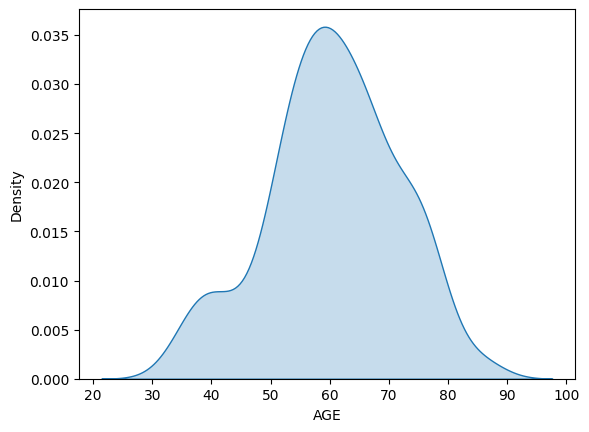

In [22]:
sns.kdeplot(data=df["AGE"], fill = True, bw_adjust = 1)

In [23]:
contingency_table = pd.crosstab(df['SITE_APP'],df['Declin'])
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
contingency_table_percentage = contingency_table_percentage.round(2)
contingency_table_percentage

Declin,Fast,Slow
SITE_APP,,
Bulbaire,78.05,21.95
Membre inférieur,46.88,53.12
Membre supérieur,41.56,58.44


In [24]:
tableau_contingence_3D = pd.crosstab([df['SEXE'],df['SITE_APP']],df['Declin'])
tableau_contingence_3D.to_excel("/home/ishaq/Downloads/Tableurs/tableau_contingence.xlsx")
contingency_table

/tmp/ipykernel_1842409/3478845136.py:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  tableau_contingence_3D.to_excel("/home/ishaq/Downloads/Tableurs/tableau_contingence.xlsx")


Declin,Fast,Slow
SITE_APP,,
Bulbaire,32,9
Membre inférieur,30,34
Membre supérieur,32,45


In [25]:
sns.factorplot(x = "SITE_APP", hue = "Declin", data = df, kind="count")

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
ALSdf = pd.read_excel("/home/ishaq/Downloads/Tableurs/Score_ALS.xlsx", dtype ={"SUBJID":str})
SUBJID = ALSdf["SUBJID"]
ALSdf = ALSdf.drop(columns=['SUBJID'])
ALSdf = ALSdf.astype(float)
ALSdf["SUBJID"] = SUBJID
ALSdf = ALSdf.drop(columns=['Unnamed: 0'])
ALSdf

In [ ]:
ALSdf.to_excel("/home/ishaq/Downloads/ALSdf.xlsx")

In [ ]:
ALSdf = ALSdf.drop(columns=['SUBJID'])

In [ ]:
red_pente = []
red_interception = []
blue_pente = []
blue_interception = []

plt.figure(figsize=(18,12))

max_x_value = 0

for index, row in ALSdf.iterrows():
    row_clean = row.dropna()
    if len(row_clean) >= 2:
        x = row_clean.index.values.reshape(-1, 1)
        y = row_clean.values.reshape(-1, 1)
        model = LinearRegression()
        model.fit(x,y)

        pente = model.coef_[0][0]
        interception = model.intercept_[0]
        equation = f'y = {pente:.2f}* x + {interception:.2f}'
  
        if pente < - 0.60:
            couleur = "lightcoral"
            red_pente.append(pente)
            red_interception.append(interception)
        else : 
            couleur = "skyblue"
            blue_pente.append(pente)
            blue_interception.append(interception)
        
        y_pred = model.predict(x)
        model.intercept_ = np.array([48]) - model.coef_ * float(row_clean.index.min()) ###
        y_pred_with_48 = model.predict(x)
        
        new_slope = model.coef_[0][0]
        
        x_values_dense = np.linspace(float(row_clean.index.min()), float(row_clean.index.max()), 100).reshape(-1,1)
        
        #print(f'Participant {subjid_col[index]} : y = {pente:.2f}x + {interception:.2f}')
        sns.lineplot(x=row_clean.index, y=y_pred_with_48.flatten(), color=couleur)
        
        max_x_value = max(max_x_value, float(row_clean.index.max()))
        
mean_red_pente = np.mean(red_pente)
mean_red_interception = np.mean(red_interception)
mean_blue_pente = np.mean(blue_pente)
mean_blue_interception = np.mean(blue_interception)

x_values_continued = (np.linspace(max_x_value, max_x_value*2,100).reshape(-1,1))-153
y_red = mean_red_pente * x_values_continued + 48
y_blue = mean_blue_pente * x_values_continued + 48

#Ticks
ticks_positions = np.arange(0,max_x_value, step=max_x_value/15.3)
ticks_labels = [f'{tick:.2f}' for tick in ticks_positions]
plt.xticks(ticks_positions, ticks_labels)

plt.ylim(0,50)

sns.lineplot(x=x_values_continued.flatten(), y=y_red.flatten(), color = "red", label = f"Droite moyenne : Déclineurs rapides\ny = {mean_red_pente:.2f} * x + {mean_red_interception:.2f}")
sns.lineplot(x=x_values_continued.flatten(), y=y_blue.flatten(), color = "blue", label = f"Droite moyenne : Déclineurs lents\ny = {mean_blue_pente:.2f} * x + {mean_blue_interception:.2f}")
plt.savefig('/home/ishaq/Downloads/Regression_Lineaire/Comparaisons/declineurs.png')

In [ ]:
red_points = []
blue_points = []

plt.figure(figsize=(20,16))
for index, row in ALSdf.iterrows():
    row_clean = row.dropna()
    if len(row_clean) >=2:
        x = row_clean.index.values.reshape(-1,1)
        y = row_clean.values.reshape(-1,1)
        model = LinearRegression()
        model.fit(x,y)
        
        slope = model.coef_[0][0]
        intercept = model.intercept_[0]
        
        if slope < -0.60:
            red_points.extend(zip(x.flatten(), y.flatten()))
        else : 
            blue_points.extend(zip(x.flatten(), y.flatten()))
red_df = pd.DataFrame(red_points, columns=['x','y'])
blue_df = pd.DataFrame(blue_points, columns=['x','y'])

red_df['x'] = pd.to_numeric(red_df["x"], errors='coerce')
blue_df['x'] = pd.to_numeric(blue_df["x"], errors='coerce')

sns.scatterplot(x='x',y='y', data=red_df, color='red', label = 'Déclineurs rapides')
sns.scatterplot(x='x',y='y', data=blue_df, color='blue', label = 'Déclineurs lents')


model_red = LinearRegression()
model_red.fit(red_df[['x']], red_df['y'])
x_red = np.array(red_df["x"])
sns.lineplot(x=x_red, y=model_red.predict(red_df[['x']]), color='red', label='Droite Regression Linéaire - Déclineurs rapides')

model_blue = LinearRegression()
model_blue.fit(blue_df[['x']], blue_df['y'])
x_blue = np.array(blue_df['x'])
sns.lineplot(x=x_blue, y=model_blue.predict(blue_df[['x']]), color='blue', label='Droite Regression Linéaire - Déclineurs lents')


plt.xlabel("Durée en mois")
plt.ylabel("Score ALSFRS")
plt.legend()
plt.show()

In [ ]:
#liste = ["01150GNP","01166MJP","01168GJP","01170CTP","01172HRP","01173WGP","01175RJP","01176KPP","01192DJP","03064BPP","04018SPP","09076CDP","10018CAP","10030CAP"]

In [ ]:
#Supprimer les lignes inutiles du dataframe ALSdf en utilisant les identifiants du dataframe SUBJID
df["SUBJID"]

In [ ]:
ALSdf["SUBJID"] = SUBJID

for index1, row1 in ALSdf.iterrows():
    green_flag = 0 
    for index2, row2 in df.iterrows():
        if row1["SUBJID"] == row2["SUBJID"] : 
            print(f"{row1['SUBJID']} présent")
            green_flag = 1 
    if green_flag == 0:
        ALSdf = ALSdf.drop(index1)
        
    #if row["SUBJID"] not in df["SUBJID"] :
        #print(f"{row['SUBJID']} absent")
ALSdf

In [ ]:
ALSdf = ALSdf.drop(columns = {"SUBJID"})

In [ ]:
ALSdf = ALSdf.reset_index(drop=True)
ALSdf 


In [ ]:
violet_pente = []
violet_interception = []
yellow_pente = []
yellow_interception = []
orange_pente = []
orange_interception = []


plt.figure(figsize=(18,12))

max_x_value = 0

for index, row in ALSdf.iterrows():
    row_clean = row.dropna()
    if len(row_clean) >= 2:
        x = row_clean.index.values.reshape(-1, 1)
        y = row_clean.values.reshape(-1, 1)
        model = LinearRegression()
        model.fit(x,y)

        pente = model.coef_[0][0]
        interception = model.intercept_[0]
        equation = f'y = {pente:.2f}* x + {interception:.2f}'
  
        if df.at[int(index),"SITE_APP"] == "Bulbaire":
            couleur = "violet"
            violet_pente.append(pente)
            violet_interception.append(interception)
        elif df.at[int(index), "SITE_APP"] == "Membre supérieur":
            couleur = "yellow"
            yellow_pente.append(pente)
            yellow_interception.append(interception)
        elif df.at[int(index), "SITE_APP"] == "Membre inférieur":
            couleur = "orange"
            orange_pente.append(pente)
            orange_interception.append(interception)
        
        y_pred = model.predict(x)
        model.intercept_ = np.array([48]) - model.coef_ * float(row_clean.index.min()) ###
        y_pred_with_48 = model.predict(x)
        
        new_slope = model.coef_[0][0]
        
        x_values_dense = np.linspace(float(row_clean.index.min()), float(row_clean.index.max()), 100).reshape(-1,1)
        
        #print(f'Participant {subjid_col[index]} : y = {pente:.2f}x + {interception:.2f}')
        sns.lineplot(x=row_clean.index, y=y_pred_with_48.flatten(), color=couleur, alpha = 0.15)
        
        max_x_value = max(max_x_value, float(row_clean.index.max()))
        
mean_violet_pente = np.mean(violet_pente)
mean_violet_interception = np.mean(violet_interception)
mean_yellow_pente = np.mean(yellow_pente)
mean_yellow_interception = np.mean(yellow_interception)
mean_orange_pente = np.mean(orange_pente)
mean_orange_interception = np.mean(orange_interception)


x_values_continued = (np.linspace(max_x_value, max_x_value,100).reshape(-1,1))
y_violet = mean_violet_pente * x_values_continued + 48
y_yellow = mean_yellow_pente * x_values_continued + 48
y_orange = mean_orange_pente * x_values_continued + 48

#Ticks 
ticks_positions = np.arange(0, max_x_value, step=max_x_value/11.5)
ticks_labels = [f'{tick:.2f}' for tick in ticks_positions]
plt.xticks(ticks_positions, ticks_labels)

#Limite axe y 
plt.ylim(0,50)

sns.lineplot(x=x_values_continued.flatten(), y=y_violet.flatten(), color = "violet", label = f"Bulbaires\n y = {mean_violet_pente:.2f} * x + {mean_violet_interception:.2f}")
sns.lineplot(x=x_values_continued.flatten(), y=y_yellow.flatten(), color = "yellow", label = f"Spinaux : membre supérieur\n y = {mean_yellow_pente:.2f} * x + {mean_yellow_interception:.2f}")
sns.lineplot(x=x_values_continued.flatten(), y=y_orange.flatten(), color = "orange", label = f"Spinaux : membre inférieur\n y {mean_orange_pente:.2f} * x + {mean_orange_interception:.2f}")

plt.savefig('/home/ishaq/Downloads/Regression_Lineaire/Comparaisons/phenotype.png')


In [ ]:
violet_pente = []
yellow_pente = []
orange_pente = []

plt.figure(figsize=(18,12))

max_x_value = 0

for index, row in ALSdf.iterrows():
    row_clean = row.dropna()
    if len(row_clean) >= 2 :
        x = row_clean.index.values.reshape(-1,1)
        y = row_clean.values.reshape(-1,1)
        model = LinearRegression()
        model.fit(x,y)
        
        pente = model.coef_[0][0]
        interception = model.intercept_[0]
        
        if df.at[int(index), "SITE_APP"] == "Bulbaire":
            couleur = "violet"
            violet_pente.append(pente)
        elif df.at[int(index), "SITE_APP"] == "Membre supérieur" :
            couleur = "yellow"
            yellow_pente.append(pente)
        elif df.at[int(index), "SITE_APP"] == "Membre inférieur" :
            couleur = "orange"
            orange_pente.append(pente)
        y_pred = model.predict(x)
        model.intercept_ = np.array([48]) - model.coef_ * float(row_clean.index.min())
        y_pred_with_48 = model.predict(x)
        
        new_slope = model.coef_[0][0]
        
        x_values_dense = np.linspace(float(row_clean.index.min()), float(row_clean.index.max()), 100).reshape(-1,1)
        
        sns.lineplot(x=row_clean.index, y=y_pred_with_48.flatten(), color = couleur, alpha = 0.2)
        
        max_x_value = max(max_x_value, float(row_clean.index.max()))
        
mean_violet_pente = np.mean(violet_pente)
mean_yellow_pente = np.mean(yellow_pente)
mean_orange_pente = np.mean(orange_pente)

x_values_continued = (np.linspace(max_x_value, max_x_value, 100).reshape(-1,1))
y_violet = mean_violet_pente * x_values_continued + 48
y_yellow = mean_yellow_pente * x_values_continued + 48
y_orange = mean_orange_pente * x_values_continued + 48

plt.plot(x_values_continued.flatten(), y_violet.flatten(), color='violet', label= f"Bulbaire\n y = {mean_violet_pente:2f} * x + 48")
plt.plot(x_values_continued.flatten(), y_yellow.flatten(), color='yellow', label= f"Membre supérieur\n y = {mean_yellow_pente:2f} * x + 48")
plt.plot(x_values_continued.flatten(), y_orange.flatten(), color='orange', label= f"Membre inférieur\n y = {mean_orange_pente:2f} * x + 48")


ticks_positions = np.arange(0, max_x_value, step = max_x_value / 11.5)
ticks_labels = [f'{tick:.2f}' for tick in ticks_positions]
plt.xticks(ticks_positions, ticks_labels)

plt.ylim(0,50)



plt.legend()

plt.show()
        

In [ ]:
violet_pente = []
yellow_pente = []
orange_pente = []

plt.figure(figsize=(18,12))

max_x_value = 0

for index, row in ALSdf.iterrows():
    row_clean = row.dropna()
    if len(row_clean) >= 2 :
        x = row_clean.index.values.reshape(-1,1)
        y = row_clean.values.reshape(-1,1)
        model = LinearRegression()
        model.fit(x,y)
        
        pente = model.coef_[0][0]
        interception = model.intercept_[0]
        
        if df.at[int(index), "SITE_APP"] == "Bulbaire":
            couleur = "violet"
            violet_pente.append(pente)
        elif df.at[int(index), "SITE_APP"] == "Membre supérieur" :
            couleur = "yellow"
            yellow_pente.append(pente)
        elif df.at[int(index), "SITE_APP"] == "Membre inférieur" :
            couleur = "orange"
            orange_pente.append(pente)
        y_pred = model.predict(x)
        model.intercept_ = np.array([48]) - model.coef_ * float(row_clean.index.min())
        y_pred_with_48 = model.predict(x)
        
        new_slope = model.coef_[0][0]
        
        x_values_dense = np.linspace(float(row_clean.index.min()), float(row_clean.index.max()), 100).reshape(-1,1)
        
        sns.lineplot(x=row_clean.index, y=y_pred_with_48.flatten(), color = couleur, alpha = 0.2)
        
        max_x_value = max(max_x_value, float(row_clean.index.max()))
        
mean_violet_pente = np.mean(violet_pente)
mean_yellow_pente = np.mean(yellow_pente)
mean_orange_pente = np.mean(orange_pente)

x_values_continued = (np.linspace(max_x_value, max_x_value, 100).reshape(-1,1))
y_violet = mean_violet_pente * x_values_continued + 48
y_yellow = mean_yellow_pente * x_values_continued + 48
y_orange = mean_orange_pente * x_values_continued + 48

plt.plot(x_values_continued.flatten(), y_violet.flatten(), color='violet', label= f"Bulbaire\n y = {mean_violet_pente:2f} * x + 48")
plt.plot(x_values_continued.flatten(), y_yellow.flatten(), color='yellow', label= f"Membre supérieur\n y = {mean_yellow_pente:2f} * x + 48")
plt.plot(x_values_continued.flatten(), y_orange.flatten(), color='orange', label= f"Membre inférieur\n y = {mean_orange_pente:2f} * x + 48")


ticks_positions = np.arange(0, max_x_value, step = max_x_value / 11.5)
ticks_labels = [f'{tick:.2f}' for tick in ticks_positions]
plt.xticks(ticks_positions, ticks_labels)

plt.ylim(0,50)



plt.legend()

plt.show()
        

In [ ]:
violet_pente = []
violet_interception = []
orange_points = []
orange_interception = []

plt.figure(figsize=(12,8))

for index, row in ALSdf.iterrows():
    row_cleaned = row.dropna()
    
    if len(row_cleaned) < 2 : 
        continue
    model = LinearRegression()
    x = row_cleaned.index.values.reshape(-1,1)
    y = row_cleaned.values.reshape(-1,1)
    model.fit(x,y)
    
    pente= model.coef_[0][0]
    interception = model.intercept_[0]
    equation = f'y = {pente:.2f}* x + {interception:.2f}'
    
    x_pred = np.linspace(int(min(x)),int(max(x)),100).reshape(-1,1) 
    y_pred = model.predict(x_pred)+ (48 - model.intercept_)
    
    if df.at[int(index), "SITE_APP"] == "Bulbaire" :
        couleur = "violet"
        violet_pente.append(pente)
        violet_interception.append(interception)
    if df.at[int(index), "SITE_APP"] == "Membre inférieur" or df.at[int(index),"SITE_APP"] == "Membre supérieur" : 
        couleur = "orange"
        orange_pente.append(pente)
        orange_interception.append(interception)
        
    plt.plot(x_pred,y_pred,color = couleur, alpha = 0.05)
    
mean_violet_pente = np.mean(violet_pente)
print(f"moyenne ={mean_violet_pente}")
mean_violet_interception = np.mean(violet_interception)
mean_orange_pente = np.mean(orange_pente)
mean_orange_interception = np.mean(orange_interception)

#plt.figure(figsize=(12,10))

x_violet_pred = np.linspace(int(min(x)), int(max(x)), 100).reshape(-1,1)
y_violet_pred = mean_violet_pente * x_violet_pred + mean_violet_interception
plt.plot(x_violet_pred, y_violet_pred, color='violet', label='Droite de déclinaison des formes bulbaires')

x_orange_pred = np.linspace(int(min(x)), int(max(x)), 100).reshape(-1,1)
y_orange_pred = mean_orange_pente * x_orange_pred + mean_orange_interception
plt.plot(x_orange_pred, y_orange_pred, color='orange', label='Droite de déclinaison des formes spinales')
plt.legend()


In [ ]:
mean_violet_pente

In [ ]:
mean_orange_pente